# Predicting Religion
Using a survey dataset from Kaggle, we attempt to predict survey participant's religion. (This uses mainly decision trees)

In [2]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor

We begin by looking at the column names


In [3]:
col = pd.read_csv('young-people-survey/columns.csv')
col.head()

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs
2,"Dance, Disco, Funk",Dance
3,Folk music,Folk
4,Country,Country


The .describe() function gives us a summary of the dataframe

In [4]:
resp = pd.read_csv('young-people-survey/responses.csv')
resp.describe()

/Library/Python/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


## Indexing the dataframe

Next, we will look into how to access elements of the dataframe.
Using the [ ] operator we can access columns by name.

In [5]:
resp['Number of friends']

0       3
1       3
2       3
3       1
4       3
5       3
6       3
7       4
8       2
9       3
10      3
11      4
12      3
13      3
14      5
15      3
16      4
17      2
18      2
19      4
20      3
21      3
22      2
23      3
24      2
25      4
26      4
27      3
28      5
29      4
       ..
980     5
981     2
982     3
983     4
984     3
985     3
986     5
987     2
988     5
989     3
990     5
991     3
992     3
993     3
994     2
995     3
996     3
997     5
998     3
999     3
1000    2
1001    4
1002    4
1003    3
1004    5
1005    3
1006    3
1007    1
1008    3
1009    2
Name: Number of friends, dtype: int64

We can access columns by number, range of numbers or list of names as follows:

In [6]:
resp[[0]] #Gives column 1
resp[[1,2,4]] # Gives columns 2,3,5
resp[['Number of siblings','Movies']] #Obvious. Note the [[ ]]


,Number of siblings,Movies
0,1.0,5.0
1,2.0,5.0
2,2.0,5.0
3,1.0,5.0
4,1.0,5.0
5,1.0,5.0
6,1.0,4.0
7,1.0,5.0
8,1.0,5.0
9,3.0,5.0


We can also access rows of the dataframe using .loc[ ] and .iloc[ ]. The .loc[ ] function uses the **names** of rows and columns to index the dataframe. The .iloc[ ] function uses **integers** to index the dataframe.

In [7]:
resp.loc[1] # Row 1---It's not zero based indexing on rows
#resp.loc[-1] #Doesn't work like numpy
resp.loc[:,'Finances'] # The : operator means all rows
resp.loc[1:2,['Age','Music']] # Rows 1 and 2 and obvious columns 


,Age,Music
1,19.0,4.0
2,20.0,5.0


In [8]:
resp.iloc[-1,2] #Does work like numpy!
resp.iloc[0,0]
resp.iloc[0:7,0:10] #Zero based indexing

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0
6,5.0,5.0,5.0,3.0,1.0,2.0,2.0,5.0,3.0,1.0


## Masking the dataframe
We can use boolian masks to access only elements of the data that meet certain requirements. Say, for instance, that we only want responders that love country music and we only want columns that every single responder answered. How can we do this?

In [9]:
countryMask = resp["Country"] == 5 #Makes a boolian vector
countryLove = resp.loc[countryMask] #Gives us people who love country
countryLove.iloc[0:4] #Gives us the first 4

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
41,5.0,4.0,5.0,5.0,5.0,5.0,1.0,1.0,4.0,5.0,...,20.0,188.0,80.0,3.0,male,right handed,college/bachelor degree,no,city,block of flats
52,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,...,21.0,160.0,58.0,2.0,female,right handed,secondary school,no,village,block of flats
62,5.0,3.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,...,23.0,189.0,81.0,2.0,male,right handed,secondary school,no,city,block of flats
85,5.0,2.0,3.0,3.0,5.0,5.0,3.0,3.0,4.0,4.0,...,22.0,159.0,53.0,2.0,male,right handed,college/bachelor degree,no,city,block of flats


But how to find the questions that were answered by every responder? If you recall the describe( ) function from before, you will remember that it gave a count for each column.

In [10]:
resp.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


In [11]:
resp.shape

(1010, 150)

Using the same method as before, we give it our best guess

In [12]:
summary = resp.describe()
answerMask = summary.loc['count'] == 1010
resp.loc[countryMask,answerMask]

IndexingError: Unalignable boolean Series key provided

It doesn't work. As it turns out, the .describe function only gave us 139 columns because only 139 columns have numeric answers so array broadcasting won't work. Now we introduce two new functions that act on a dataframe object .isnull( ) and .sum( ). The .sum( ) function gives us column sums for axis=0 and row sums for axis=1

In [13]:
resp.isnull().sum(axis=0)

Music                          3
Slow songs or fast songs       2
Dance                          4
Folk                           5
Country                        5
Classical music                7
Musical                        2
Pop                            3
Rock                           6
Metal or Hardrock              3
Punk                           8
Hiphop, Rap                    4
Reggae, Ska                    7
Swing, Jazz                    6
Rock n roll                    7
Alternative                    7
Latino                         8
Techno, Trance                 7
Opera                          1
Movies                         6
Horror                         2
Thriller                       1
Comedy                         3
Romantic                       3
Sci-fi                         2
War                            2
Fantasy/Fairy tales            3
Animated                       3
Documentary                    8
Western                        4
          

Using these functions we make a new mask

In [14]:
answerMask = resp.isnull().sum(axis=0) == 0
subset = resp.loc[countryMask,answerMask].copy()
subset

,Snakes,Eating to survive,Dreams,Number of friends,Internet usage,Spending on gadgets
41,1,1,4,3,few hours a day,1
52,5,3,3,5,few hours a day,1
62,5,5,4,5,few hours a day,2
85,4,2,3,4,most of the day,5
93,1,4,2,5,few hours a day,4
106,2,4,3,4,few hours a day,4
128,1,2,4,1,few hours a day,2
210,4,5,4,4,few hours a day,4
276,4,4,4,4,few hours a day,1
295,5,2,3,2,few hours a day,2


Ahh, it worked. Now that we have our subset of country music lovers, we can learn some things about them. Let's begin by changing the internet answers to numbers.

In [15]:
subset.dtypes

Snakes                  int64
Eating to survive       int64
Dreams                  int64
Number of friends       int64
Internet usage         object
Spending on gadgets     int64
dtype: object

Looking at our internet columns we can order the results as follows:

In [16]:
internetOrder = ['less than an hour a day',
                 'few hours a day',
                 'most of the day']

subset['Internet usage'] = pd.Categorical(subset['Internet usage'], 
                                          ordered=True, 
                                          categories=internetOrder)

In [17]:
subset.dtypes

Snakes                    int64
Eating to survive         int64
Dreams                    int64
Number of friends         int64
Internet usage         category
Spending on gadgets       int64
dtype: object

We've turned the internet column into ordered categories. Now that we've done this we can get the codes for each category.

In [18]:
codes = subset['Internet usage'].cat.codes
codes.iloc[0:5] #Print the first five codes

41    1
52    1
62    1
85    2
93    1
dtype: int8

Now we can assign the codes to the internet column

In [19]:
subset['Internet usage'] = codes.astype('int')
subset.dtypes

Snakes                 int64
Eating to survive      int64
Dreams                 int64
Number of friends      int64
Internet usage         int64
Spending on gadgets    int64
dtype: object

Now everything in our dataframe is integers!

In [20]:
subset.corr()

,Snakes,Eating to survive,Dreams,Number of friends,Internet usage,Spending on gadgets
Snakes,1.000000,0.346181,0.153862,0.109456,0.311611,0.173713
Eating to survive,0.346181,1.000000,0.446765,0.309764,0.115853,0.416416
Dreams,0.153862,0.446765,1.000000,-0.051541,0.000000,-0.055594
Number of friends,0.109456,0.309764,-0.051541,1.000000,-0.173009,0.027268
Internet usage,0.311611,0.115853,0.000000,-0.173009,1.000000,0.361186
Spending on gadgets,0.173713,0.416416,-0.055594,0.027268,0.361186,1.000000


It seems like how much you like snakes and how rarely you eat to survive have the biggest impact on this subset

Let's look at all the data again and find the most correlated columns.

In [21]:
correl = resp.corr()
for i in range(139): correl.iloc[i,i] = 0
X = np.triu(correl.values)
s = X.shape
x = abs(np.ravel(X))
xsorted = np.argsort(x)[::-1]
XSorted = [[n//139,n % 139] for n in xsorted]
mostCorr = [[correl.columns[x[0]],correl.columns[x[1]],X[x[0],x[1]]] for x in XSorted]
mostCorr = pd.DataFrame(mostCorr,columns=["Question1","Question2","Correlation"])

Now that we've found the most correlated variables, let's look at only the ones that have a corelation coefficient greater than .5 in absolute value.

In [22]:
mostCorr.loc[abs(mostCorr.Correlation)>.5]

,Question1,Question2,Correlation
0,Biology,Medicine,0.715551
1,Height,Weight,0.697696
2,Biology,Chemistry,0.689859
3,Fantasy/Fairy tales,Animated,0.674675
4,Shopping,Shopping centres,0.651585
5,Chemistry,Medicine,0.626713
6,Mathematics,Physics,0.595992
7,Classical music,Opera,0.595905
8,Snakes,Rats,0.571605
9,Metal or Hardrock,Punk,0.544016


# Machine Learning
It's time to move on to machine learning. What do we want to predict? Let's see if we can predict how religious a young adult is from their non religious information. Then, let's try to predict how much they like animation.

In [69]:
religion = correl['Religion'].copy().sort_values().iloc[::-1]
religion.iloc[0:10]

God                      0.508445
Classical music          0.301222
Final judgement          0.292835
Folk                     0.281429
Opera                    0.267173
Art exhibitions          0.260742
Musical instruments      0.257524
Reading                  0.234124
Countryside, outdoors    0.231437
Medicine                 0.227420
Name: Religion, dtype: float64

We will make a model to predict religion by selecting the 50 most highly correlated variables and training on their data. First, we  will fill all the nans with the mean of their column

In [24]:
resp = resp.fillna(resp.mean())
y = resp['Religion']
X = resp[religion.index[0:50]]

In [58]:
acc1 = np.zeros(1010)
religModel = DecisionTreeRegressor()
for N in range(1,1010):
    religModel.fit(X.iloc[0:N],y.iloc[0:N])
    acc1[N] = np.mean(religModel.predict(X[N:]) == y.values[N:])
    

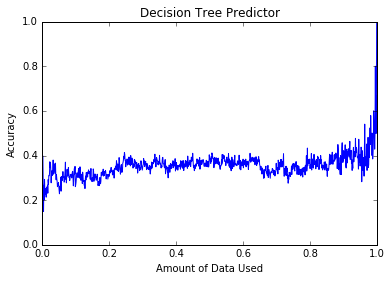

In [59]:
plt.plot(np.array(range(1010))/1010.,acc1)
plt.ylabel("Accuracy")
plt.xlabel("Amount of Data Used")
plt.title("Decision Tree Predictor")

Not so great of a model... Don't get excited by the spike at the end. It only happens because the amount of data left to test the model on is very small.

We will try some other approaches. Let's change religious to a binary classifier to simplify the prediction. Anyone who rates religion as a 4 or 5 we will label as religious and give them a score of 1. Anyone else will get a zero. Then we will run the same model again.


In [28]:
yNew = y.copy() 
yNew.loc[y<4] = 0
yNew.loc[y>=4] = 1
yNew.iloc[0:5]

0    0.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Religion, dtype: float64

Now we run it again:

In [65]:
acc2 = np.zeros(1010)
religModel = DecisionTreeRegressor()
for N in range(1,1010):
    religModel.fit(X.iloc[0:N],yNew.iloc[0:N])
    acc2[N] = np.mean(religModel.predict(X[N:]) == yNew.values[N:])

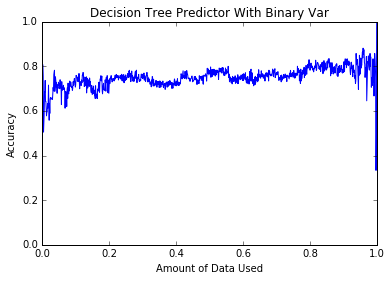

In [66]:
plt.plot(np.array(range(0,1010))/1010.,acc2)
plt.ylabel("Accuracy")
plt.xlabel("Amount of Data Used")
plt.title("Decision Tree Predictor With Binary Var")

Now that's more like it! Package it up and send it to Facebook.

But would more data make this more accurate? We only used a third of our data to train the model. What if we used more?

In [70]:
X = resp[religion.index[0:100]]

In [71]:
acc3 = np.zeros(1010)
religModel = DecisionTreeRegressor()
for N in range(1,1010):
    religModel.fit(X.iloc[0:N],yNew.iloc[0:N])
    acc3[N] = np.mean(religModel.predict(X[N:]) == yNew.values[N:])

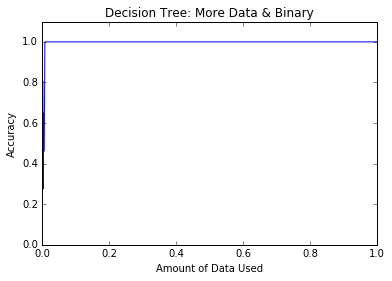

In [72]:
plt.plot(np.arange(1010)/1010.,acc3)
plt.ylabel("Accuracy")
plt.ylim(0,1.1)
plt.xlabel("Amount of Data Used")
plt.title("Decision Tree: More Data & Binary")

Can this be? 100% Accuracy? Doubtful. Let's take a look. 

In [73]:
religion.iloc[80:100]

Mood swings                 0.015150
Darkness                    0.014704
Dreams                      0.013603
Rats                        0.012947
Dance                       0.007590
Animated                    0.005703
Rock                        0.003128
PC                          0.000831
Action                      0.000647
Religion                    0.000000
Techno, Trance             -0.000781
Reggae, Ska                -0.004621
Heights                    -0.005303
Eating to survive          -0.007489
Shopping                   -0.012593
Slow songs or fast songs   -0.016042
Music                      -0.019674
Loss of interest           -0.020674
Active sport               -0.021944
Weight                     -0.023313
Name: Religion, dtype: float64

We've included our outcome column! Of course we had a perfect model... Well, the negative correlations are showing up below the zero correlated ones. Let's rearrange that by taking the absolute value.

In [74]:
religion = np.abs(correl['Religion'].copy()).sort_values().iloc[::-1]
religion.iloc[130:139]

Eating to survive    0.007489
Animated             0.005703
Heights              0.005303
Reggae, Ska          0.004621
Rock                 0.003128
PC                   0.000831
Techno, Trance       0.000781
Action               0.000647
Religion             0.000000
Name: Religion, dtype: float64

Here we are with the least correlated variables. Now that they are in order, we can take all 138 and include them.

In [75]:
X = resp[religion.index[0:138]]

In [81]:
acc4 = np.zeros(1010)
religModel = DecisionTreeRegressor()
for N in range(1,1010):
    religModel.fit(X.iloc[0:N],yNew.iloc[0:N])
    acc4[N] = np.mean(religModel.predict(X[N:]) == yNew.values[N:])

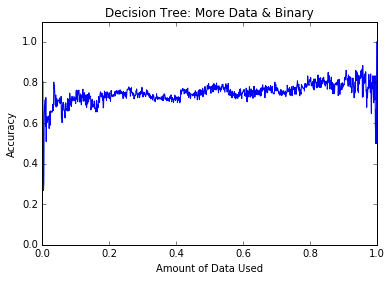

In [77]:
plt.plot(np.arange(1010)/1010.,acc4)
plt.ylabel("Accuracy")
plt.ylim(0,1.1)
plt.xlabel("Amount of Data Used")
plt.title("Decision Tree: More Data & Binary")

Let's plot our three working models together and compare them.

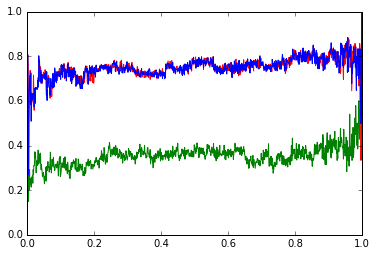

In [79]:
domain = np.arange(1010)/1010.
plt.plot(domain,acc1,color="g")
plt.plot(domain,acc2,color="r")
plt.plot(domain,acc4,color="b")
plt.show()

Suprisingly, adding more data didn't help much at all. Should we see how little data we can use and still have an accurate model? We will try several plots. With our old best in blue.

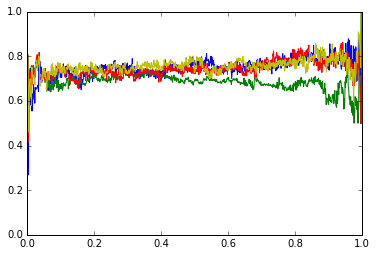

In [82]:
X1 = resp[religion.index[0:5]]
X2 = resp[religion.index[0:10]]
X3 = resp[religion.index[0:25]]

accX1 = np.zeros(1010)
for N in range(1,1010):
    religModel.fit(X1.iloc[0:N],yNew.iloc[0:N])
    accX1[N] = np.mean(religModel.predict(X1[N:]) == yNew.values[N:])
    
accX2 = np.zeros(1010)
for N in range(1,1010):
    religModel.fit(X2.iloc[0:N],yNew.iloc[0:N])
    accX2[N] = np.mean(religModel.predict(X2[N:]) == yNew.values[N:])
    
accX3 = np.zeros(1010)
religModel = DecisionTreeRegressor()
for N in range(1,1010):
    religModel.fit(X3.iloc[0:N],yNew.iloc[0:N])
    accX3[N] = np.mean(religModel.predict(X3[N:]) == yNew.values[N:])

plt.plot(domain,acc4,color="b")
plt.plot(domain,accX1,color="g")
plt.plot(domain,accX2,color="r")
plt.plot(domain,accX3,color="y")
plt.show()

The green line uses 5 factors
The red line uses 10 factors 
The blue line uses 25 factors.

As you can see, we achieve maximum accuracy very quickly: around 10 factors.